<a href="https://colab.research.google.com/github/saini7hin/portfolio-template/blob/main/Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTION USING DECISION TREE ALGORITHM**

First, you'll need to have some data to work with. For this example, let's say we have a dataset of flowers i.e, the iris flower dataset with different categories like sepal length, speal width,petal length ,petal width & species which are attributes of a flower.

Using Decision Tree Algorithm we are predicting the right class of species accordingly.

**Step - 1: Importing the required Libraries**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

**Step - 2: Importing dataset**

In [ ]:
df=pd.read_csv('/content/IRIS (1).csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Step - 3:Pre processing of Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Checking out the null values in the dataset**

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Step - 4:Training the Model**

In [ ]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
x=df.loc[:,features].values

In [ ]:
y=df.species

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)


In [ ]:
clf=DecisionTreeClassifier(max_depth=2,random_state=0)

In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
clf.predict(x_test[0:1])

array(['Iris-virginica'], dtype=object)

In [ ]:
from sklearn import metrics
import seaborn as sns

In [ ]:
score=clf.score(x_test,y_test)
print(score)

0.8947368421052632


In [ ]:
print(metrics.classification_report(y_test,clf.predict(x_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.86      0.67      0.75         9

       accuracy                           0.89        38
      macro avg       0.90      0.87      0.88        38
   weighted avg       0.90      0.89      0.89        38



**Step - 5:Visualing the data**

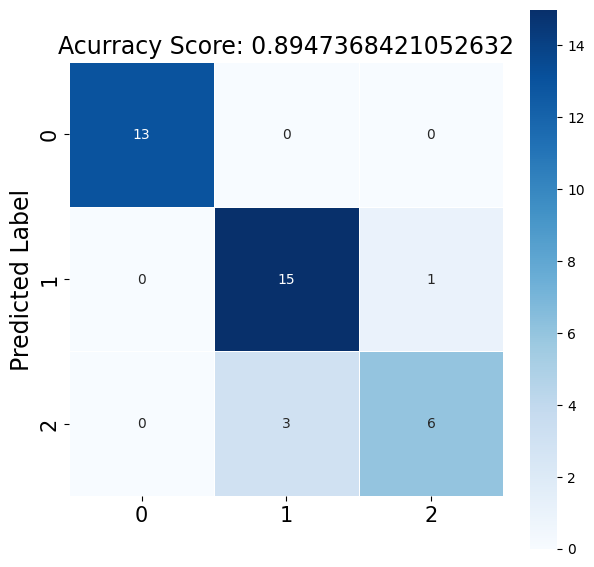

In [ ]:
cm=metrics.confusion_matrix(y_test,clf.predict(x_test))
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt=".0f",linewidth=.5,square=True,cmap='Blues');
plt.ylabel('Actual Label',fontsize=17);
plt.ylabel('Predicted Label',fontsize=17);
plt.title('Acurracy Score: {}'.format(score),size=17);
plt.tick_params(labelsize=15)

In [ ]:
max_depth_range=list(range(1,6))
accuracy=[]
for depth in max_depth_range:
  clf=DecisionTreeClassifier(max_depth=depth,random_state=0)
  clf.fit(x_train,y_train)
  score=clf.score(x_test,y_test)
  accuracy.append(score)

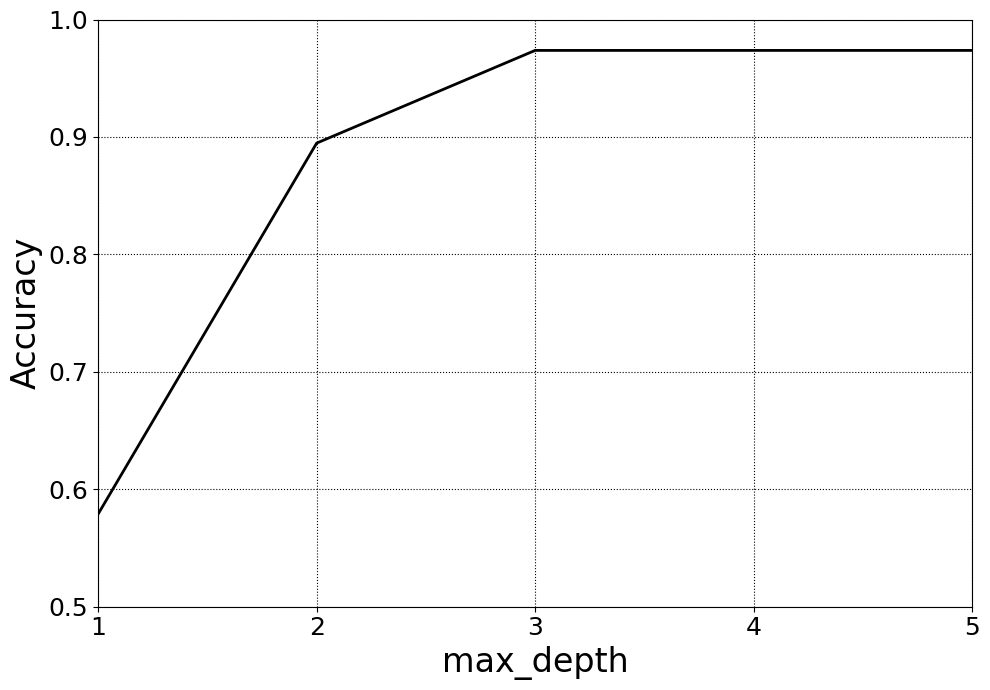

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,7))
ax.plot(max_depth_range,accuracy,lw=2,color='k')
ax.set_xlim([1,5])
ax.set_ylim([.50,1.00])
ax.grid(True,axis='both',zorder=0,linestyle=':',color='k')
ax.tick_params(labelsize=18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth',fontsize=24)
ax.set_ylabel('Accuracy',fontsize=24)
fig.tight_layout()

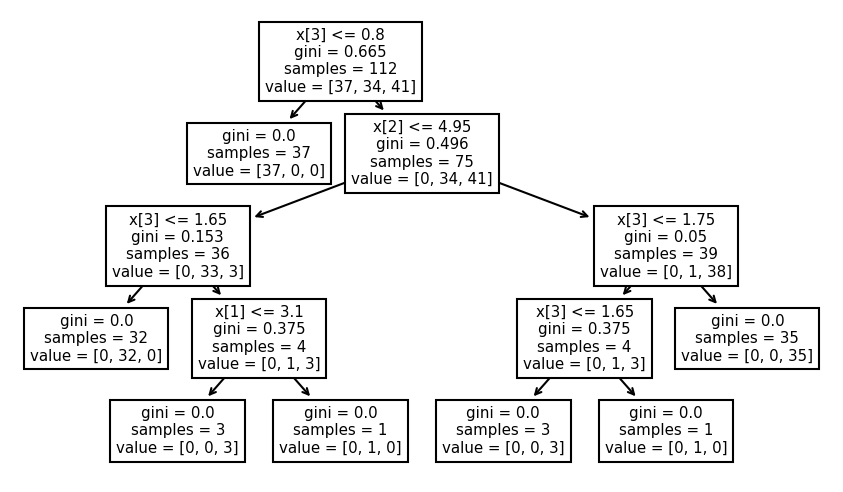

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(7,4),dpi=150)
tree.plot_tree(clf);

In [ ]:
fn=['sepal_length','sepal_width','petal_length','petal_width']
cn=['setosa','versicolor','virginica']

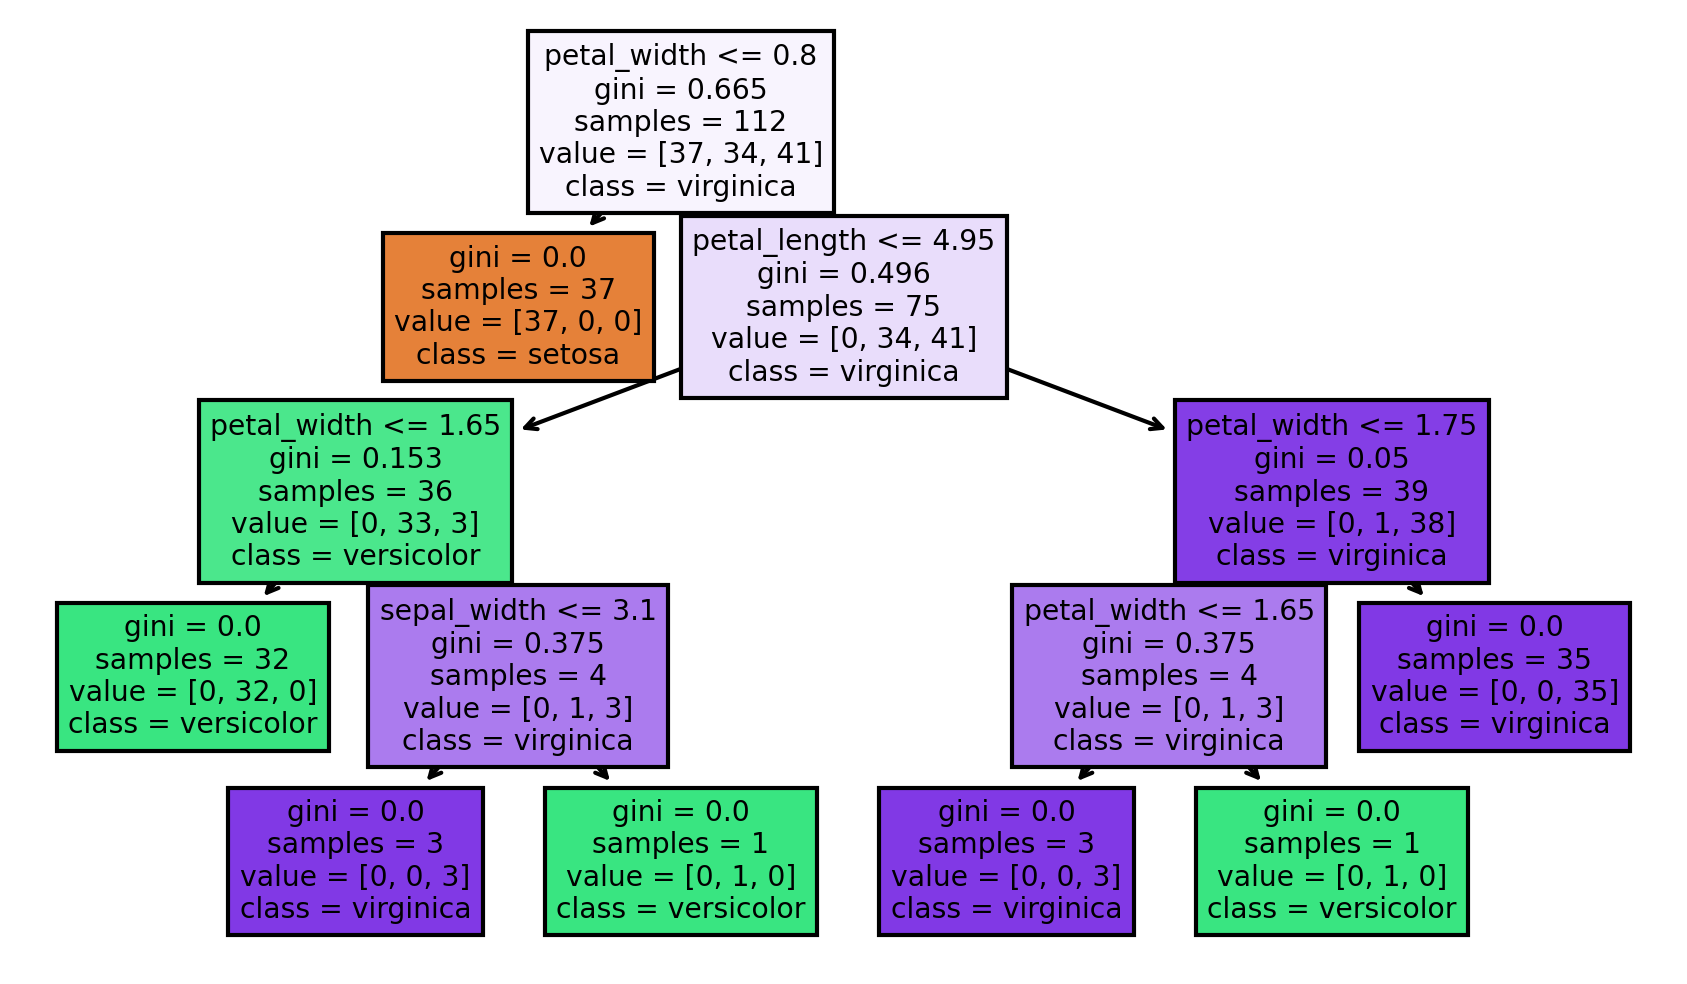

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(7,4),dpi=300)
tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

**Conclusion:**

-- After importing,Fit our dataset in our model,accuracy is 89.47%.


-- We can clearly see model performance by confusion matrix and classification report.

-- By plotting accuracy score depth wise graph,optimal depth for model is 3.